In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Import necessary libraries and dataset

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier


# Load data from csv fil
dataset = pd.read_csv('gdrive/My Drive/Task/ModelData.csv')
dataset = pd.DataFrame(dataset)
dataset.head(10)


,RMS,CC,F0,F1,Class
0,2.1159,0.9834,3.116531,0.176920,0
1,1.8772,0.9733,2.212684,2.392617,0
2,1.9290,0.9822,2.338491,2.575447,0
3,1.8216,0.9777,2.555161,2.578739,0
4,1.6639,0.9715,2.010262,2.036390,0
5,0.1677,0.4323,0.218718,0.013475,1
6,3.0635,0.9528,3.492780,3.773862,1
7,2.0692,0.9781,2.835503,2.953903,1
8,2.1089,0.9816,2.378931,2.661001,1
9,1.8292,0.9464,2.233631,2.253951,1


In [6]:
dataset.shape

(55, 5)

Data Augmentation

In [7]:
dataset = dataset.append(dataset, ignore_index = True)
dataset = dataset.append(dataset, ignore_index = True)
dataset = dataset.append(dataset, ignore_index = True)

In [8]:
dataset.shape

(440, 5)

Random Shuffling of Data

In [9]:
from sklearn.utils import shuffle

shuffled = shuffle(dataset)
shuffled.head(10)

,RMS,CC,F0,F1,Class
295,2.3414,0.9839,2.681197,2.880875,4
254,2.5574,0.9748,3.681670,3.702115,6
80,2.9704,0.9855,4.150619,4.179194,5
57,1.9290,0.9822,2.338491,2.575447,0
86,2.9946,0.9802,3.643142,3.780288,6
204,1.8866,0.9516,-0.163198,0.643120,7
315,2.4168,0.9873,3.320648,3.265477,8
414,0.1522,0.3479,0.022880,0.011578,5
342,2.8177,0.9919,3.612397,3.665143,2
277,1.9290,0.9822,2.338491,2.575447,0


In [10]:
shuffled.shape

(440, 5)

Data Splitting

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(shuffled.iloc[:,:4], shuffled.Class ,test_size = 0.20, random_state = 42)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(352, 4)
(352,)
(88, 4)
(88,)


Model Fitting - Gradient Boosting Classifier

In [17]:
# Train the Random Forest model
model = GradientBoostingClassifier(random_state= 42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [18]:
model.score(X_test,y_test)

0.9772727272727273

In [19]:
# Make predictions on the test set
y_pred =model.predict(X_test)


Model Accuracy

In [20]:
# Evaluate the performance of the model using accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

Accuracy:  0.9772727272727273
Precision:  0.9810606060606062
Recall:  0.9772727272727273
F1 score:  0.9768853305785125


Confusion Matrix

/bin/bash: matplotlib: command not found


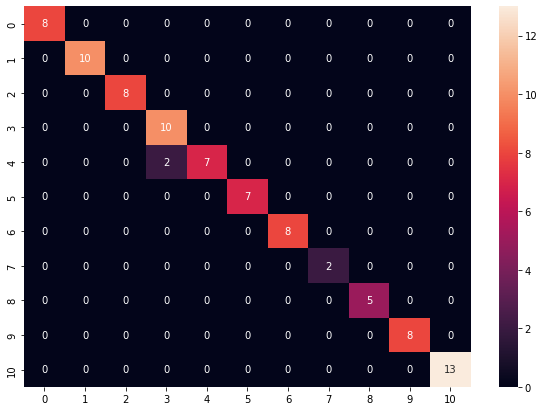

In [21]:
!matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel = ('Predicted')
plt.ylabel = ('Truth')